# CCSNe Example

In [1]:
import simple
import os, logging

#logging.basicConfig(level=logging.INFO)

overwrite_existing = False
defaults = simple.load_defaults('test.yaml')

models = simple.load_models(**defaults['load_models'], overwrite=overwrite_existing)
models

Models in collection:

- [0] Ri18_m15 (CCSNe)
- [1] Ri18_m20 (CCSNe)
- [2] Ri18_m25 (CCSNe)
- [3] Pi16_m15 (CCSNe)
- [4] Pi16_m20 (CCSNe)
- [5] Pi16_m25 (CCSNe)
- [6] La22_m15 (CCSNe)
- [7] La22_m20 (CCSNe)
- [8] La22_m25 (CCSNe)
- [9] Si18_m15 (CCSNe)
- [10] Si18_m20 (CCSNe)
- [11] Si18_m25 (CCSNe)
- [12] Ra02_m15 (CCSNe)
- [13] Ra02_m20 (CCSNe)
- [14] Ra02_m25 (CCSNe)
- [15] LC18_m15 (CCSNe)
- [16] LC18_m20 (CCSNe)
- [17] LC18_m25 (CCSNe)

References in collection:

- iniab2.0E-02GN93 (IsoRef)
- W17 (IsoRef)
- iniab2.0E-02GN93_Lo03 (IsoRef)
- iniab1.3E-02Lo03_Lo03_merged (IsoRef)
- rau_solar_ref (IsoRef)
- iniab1.3E-02As09_As09_merged (IsoRef)

In [2]:
models[0]

**Name**: Ri18_m15\
**Class Name**: CCSNe\
**Type**: CCSNe\
**Dataset**: Ri18\
**Mass**: 15\
**Attributes**: *abundance*, *abundance_keys*, *abundance_values*, *citation*, *clsname*, *dataset*, *mass*, *masscoord*, *name*, *refid_isoabu*, *refid_isomass*, *type*

---
This does the internal normalisation and solar - 1 normalisation.
These are avaliable through the ``intnorm`` and ``simplenorm`` attributes on each model after this. Each of these attributes is a dict containing the result of the calculations. 

For internally normalised the main result is called ``eRi`` which is contains the internally normalised data. Note that unlike this result has not been divided by one of the ratios to create slopes. To get a slope you have to do that manually (See example below). This way we can use whatever slope we want without rerunning the calculation and we have the direction as well. 

For the solar - 1 normalisation the main result is called ``Ri``.

In [2]:
models.internal_normalisation(**defaults['internal_normalisation'], min_dilution_factor=0.1)
models.simple_normalisation(**defaults['simple_normalisation'])

695 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
773 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
652 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
284 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
259 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
103 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
34 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
44 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
1 rows have largest offsets smaller than 1 at the minimun dilution factor of 0.1. These rows are set to nan.
266 r

---
# Plotting

Plot-a-doodle-doo

In [3]:
import matplotlib.pyplot as plt
import numpy as np

colours=simple.ccsne.colours
linestyles = simple.ccsne.linestyles
markers = simple.ccsne.markers

This looks pretty much the same as the one from Gabors notebook.
The X values are lower because the values have been divided by the mass here and not in gabors notebook.
Also seems I have not cut off the lower masscoordinates in the Ritter model

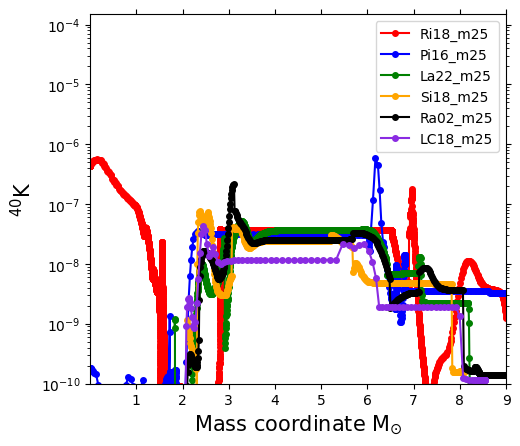

In [4]:
ifig=24
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('K-40')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.semilogy(model.masscoord, model.abundance[iso],
                 color=colours[i], marker=markers[0], markersize=4,ls=linestyles[0],
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),9)
plt.ylim(1e-10,1.5e-4)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(iso.latex(),fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()

(-10.0, 15.0)

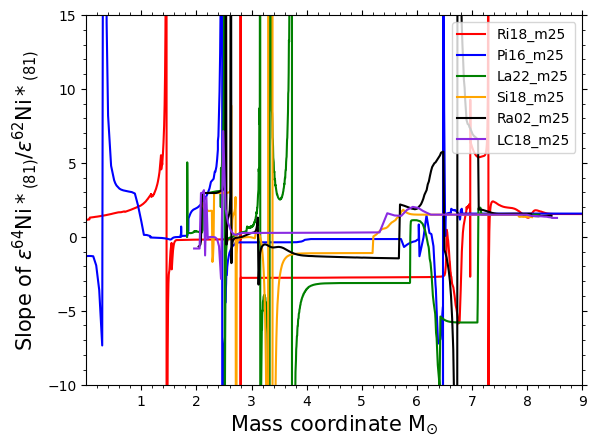

In [5]:
# I put the plotting fucntion within the ccsne namespace since they are specific to these models types.

simple.ccsne.plot_slopes(models, 'Ni-64*/Ni-62*', where='.mass==25')
plt.ylim(-10,15)

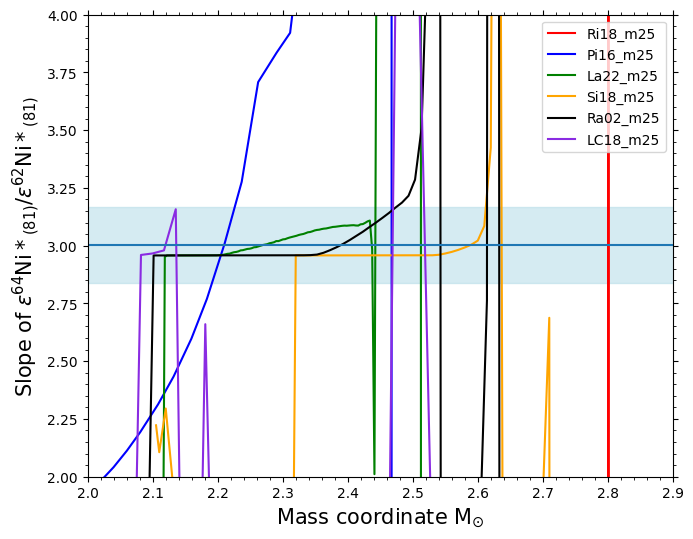

In [6]:
simple.ccsne.plot_slopes(models, 'Ni-64*/Ni-62*', where='.mass==25')
plt.ylim(-10,15)

plt.xlim(2,2.9)
plt.ylim(2,4)
plt.hlines(3.003,0,10)
x = np.linspace(0, 10, 100)
plt.fill_between(x, 3.003-0.166, 3.003+0.166, color='lightblue', alpha=0.5)

(-15.0, 25.0)

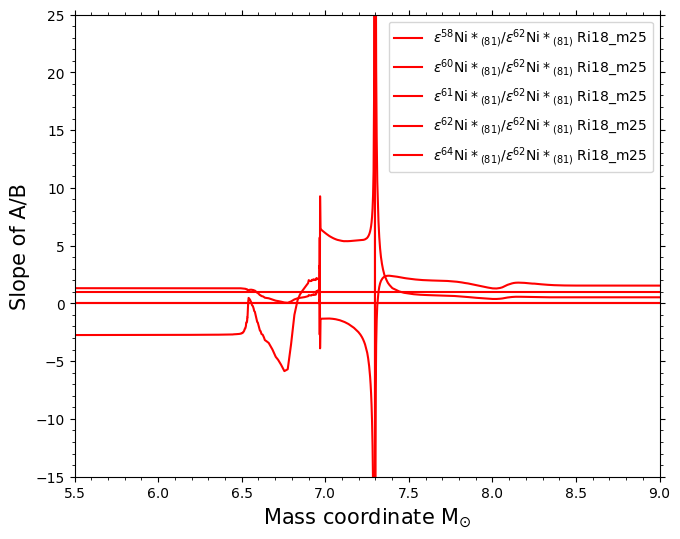

In [7]:
simple.ccsne.plot_slopes(models, **defaults['plot_slopes_example'])
plt.xlim(5.5,9)
plt.ylim(-15,25)

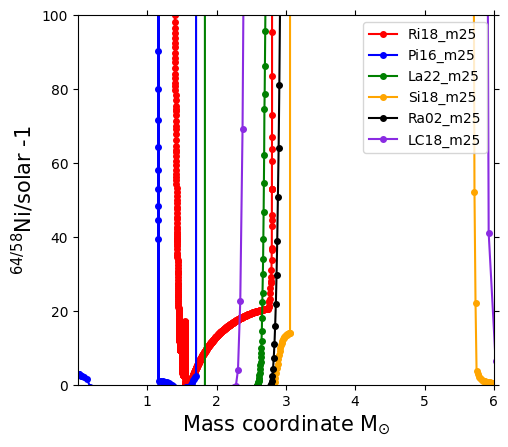

In [8]:
# plot solar ratio - 1 for selected isotopes, for different models
ifig=26
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('Ni-64*')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.plot(model.masscoord, model.simplenorm['Ri'][iso],
                 color=colours[i], marker=markers[0], markersize=4,ls=linestyles[0],
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),6)
plt.ylim(0,100)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(f'{models[0].simplenorm["label_latex"][iso]}/solar -1',fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()